In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import  input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
mnist.train.images.shape,mnist.train.labels.shape

((55000, 784), (55000, 10))

In [6]:
mnist.test.images.shape,mnist.test.labels.shape

((10000, 784), (10000, 10))

In [7]:
mnist.validation.images.shape,mnist.validation.labels.shape

((5000, 784), (5000, 10))

In [25]:
image1=mnist.train.images[1409]
image1=np.array(image1,float)
image1=image1.reshape((28,28))

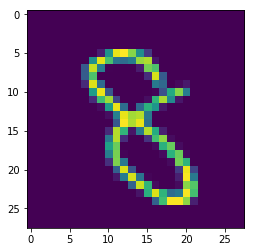

In [26]:
plt.imshow(image1)
plt.show()

In [27]:
n_input=784
n_hl1=256
n_hl2=256
n_output=10

weights={
    'h1':tf.Variable(tf.random_normal(shape=(n_input,n_hl1))),  # weight matrix for layer 1
    'h2':tf.Variable(tf.random_normal(shape=(n_hl1,n_hl2))),    # weight matrix for layer 2
    'out':tf.Variable(tf.random_normal(shape=(n_hl2,n_output))) # weight matrix for layer 3
}
biases={
    'h1':tf.Variable(tf.random_normal(shape=(n_hl1,))),         # biases for layer 1
    'h2':tf.Variable(tf.random_normal(shape=(n_hl2,))),         # biases for layer 1
    'out':tf.Variable(tf.random_normal(shape=(n_output,)))      # biases for layer 1
}

In [28]:
def fwd_prop(x,weights,biases):
    layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    layer1=tf.nn.relu(layer1)  #activation 
    
    layer2=tf.add(tf.matmul(layer1,weights['h2']),biases['h2'])
    layer2=tf.nn.relu(layer2)
    
    output=tf.add(tf.matmul(layer2,weights['out']),biases['out'])
    return output

In [29]:
x=tf.placeholder('float',[None,n_input])      #since no. of input instance is different for training and testing
y=tf.placeholder(tf.int32,[None,n_output])

pred=fwd_prop(x,weights,biases)

In [30]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y))

In [43]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)

In [44]:
optimize=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [45]:
batch_size=100
for i in range(25):
    num_batches=mnist.train.num_examples//batch_size
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        c,_=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost+=c
    print(total_cost)    

27231.33910024166
4542.076659411192
2454.8199114196054
1742.5035968616767
1333.188503019277
1236.421413205138
1095.6023944633203
968.6495960657795
876.4085784306902
731.90724591153
631.6180648464435
588.5238153161678
537.4821854892184
492.9487128973759
412.6542079154782
388.290187825341
386.9122519229968
263.0261857748095
287.5062082359881
270.0267461304483
197.23788007441806
175.36391021090486
167.10829406175938
155.21644658602798
137.60303527365934


In [37]:
predictions=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)
correct_preds=tf.equal(predictions,true_labels)
correct_ones,labels,correct_preds=sess.run([predictions, true_labels,correct_preds],feed_dict={x:mnist.test.images,y:mnist.test.labels})
print(correct_ones)
print(labels)
print(correct_preds)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
[ True  True  True ...  True  True  True]


In [38]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_11:0' shape=(10,) dtype=float32_ref>]